# HW05 (제출기한-5월3일 금요일 15시)
Datascience 모듈의 기본적인 visualization 연습을 위한 문제입니다. 
- 반드시 수업시간 배운 내용만을 사용하여 코드를 작성합니다. 
- 한 셀에 여러줄의 코드를 사용해도 무방합니다.

제출시 다음 사항에 유의하기 바랍니다.
- 텍스트 셀에 설명되어 있는 각 문항을 잘 읽은 뒤,
- 코드 셀에 적절한 코드를 작성하기 바랍니다.
- 작성 후 파일명에 ``학번``을 명시후 지정한 공유폴더에 업로드합니다.
- 이때, 공유를 반드시 profkwon@cicweb.ulsan.ac.kr 에게만 합니다.


In [0]:
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

### 수업시간에 사용하였던 다음 인구데이터를 이용합니다.
- 성별(SEX)은 0:전체, 1:남성, 2:여성을 의미한다.
- 나이(AGE)는 0~99까지는 해당 나이, 100은 100세 이상, 999는 전연령을 의미한다.

In [0]:
newlabel=[str(y) for y in np.arange(2010, 2016)]
oldlabel=['POPESTIMATE'+s for s in newlabel]
census = Table.read_table('nc-est2015-agesex-res.csv').drop('CENSUS2010POP','ESTIMATESBASE2010').relabeled(oldlabel, newlabel)
census

SEX,AGE,2010,2011,2012,2013,2014,2015
0,0,3951330,3963087,3926540,3931141,3949775,3978038
0,1,3957888,3966551,3977939,3942872,3949776,3968564
0,2,4090862,3971565,3980095,3992720,3959664,3966583
0,3,4111920,4102470,3983157,3992734,4007079,3974061
0,4,4077551,4122294,4112849,3994449,4005716,4020035
0,5,4064653,4087709,4132242,4123626,4006900,4018158
0,6,4073013,4074993,4097605,4142916,4135930,4019207
0,7,4043046,4083225,4084913,4108349,4155326,4148360
0,8,4025604,4053203,4093177,4095711,4120903,4167887
0,9,4125415,4035710,4063152,4104072,4108349,4133564


### 문제1
2010년 인구와 2015년 인구사이에 산점도를 그리시오. 

(단, 모든성별, 0~99세 연령에 대해서만 그리시오.)

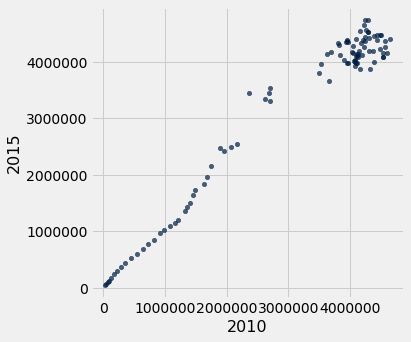

In [0]:
census.where('SEX',0).where('AGE',are.below(100)).scatter('2010', '2015')

### 문제2
2010년 남성과 여성에 대해서 연령(0~99세)에 따라 인구의 변화를 line graph로 그려보시오.

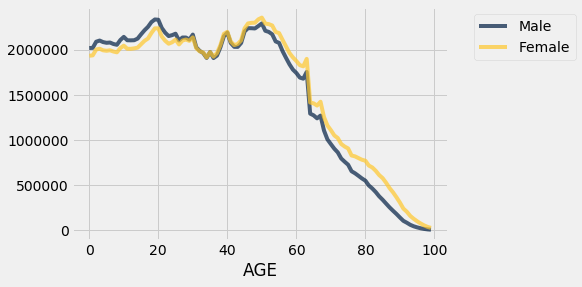

In [0]:
Table().with_columns(
    'AGE', np.arange(0,100),
    'Male', census.where('SEX',1).where('AGE',are.below(100)).column('2010'),
    'Female', census.where('SEX',2).where('AGE',are.below(100)).column('2010')
).plot('AGE')

### 문제3
2010년과 2015년 100세 이상 인구 중 남자와 여자의 비율을 백분율 정보를 포함하도록 Table변수 ``ratio``을 생성하시오. 

In [0]:
sum2010 = census.where('AGE',100).column('2010').item(0)
sum2015 = census.where('AGE',100).column('2015').item(0)
ratio = census.where('AGE', 100).select('SEX','AGE','2010','2015')
ratio = ratio.with_columns(
  'Proportion2010', ratio.column('2010')/sum2010,
  'Proportion2015', ratio.column('2015')/sum2015
).set_format(['Proportion2010', 'Proportion2015'], PercentFormatter)

In [0]:
ratio

SEX,AGE,2010,2015,Proportion2010,Proportion2015
0,100,54410,76974,100.00%,100.00%
1,100,9352,15088,17.19%,19.60%
2,100,45058,61886,82.81%,80.40%


### 문제4
위에서 구한 ratio 변수를 가지고 수평bar graph를 다음과 같이 그리시오. 

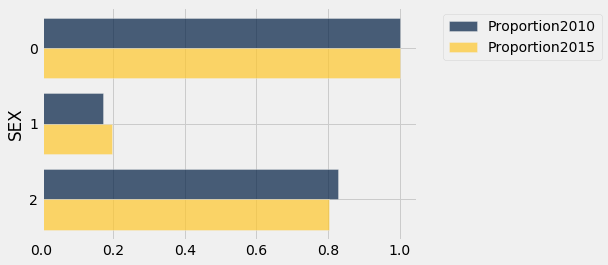

In [0]:
ratio.select('SEX','Proportion2010','Proportion2015').barh('SEX')

### 문제5
2010년 대비 2015년 남성인구의 연령별 증감(즉, 2015년 인구 - 2010년 인구)을 나타내는 'male change' column이 포함된 ``change_male`` Table 변수를 생성하시오. 

In [0]:
change_male=census.where('SEX',1).where('AGE', are.below(100)).drop('2011', '2012','2013','2014')
change_male=change_male.with_column(
  'male change', change_male.column('2015')-change_male.column('2010')
)

In [0]:
change_male

SEX,AGE,2010,2015,male change
1,0,2018420,2035134,16714
1,1,2020332,2029295,8963
1,2,2088685,2026604,-62081
1,3,2101272,2030644,-70628
1,4,2084312,2055924,-28388
1,5,2076573,2050848,-25725
1,6,2079410,2050663,-28747
1,7,2063139,2117118,53979
1,8,2054462,2128825,74363
1,9,2107037,2111678,4641


### 문제6
``change`` Table에서 ``male change``에 관한 분포(historgram)을 그리시오. 
(단 bin의 개수를 20개로 설정하시오)


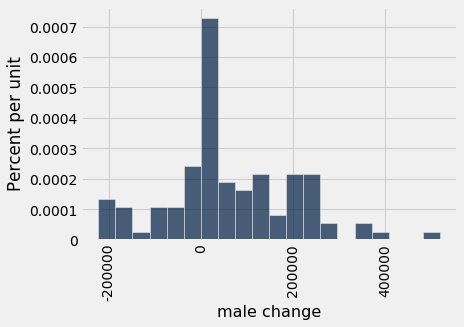

In [0]:
change_male.hist('male change', bins=20)

### 보너스문제
위 데이터에 대하여 본인이 출제하고 싶은 문제가 있으면 한 문제를 출제하고 아래에 답안 코드를 작성하시오.